## Configuration

In [10]:
# Data management
import pandas as pd
import numpy as np

# Graphics
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
import seaborn as sns
sns.set(font_scale=1.4)
sns.set_style("whitegrid")
sns.set_style({'font.family':'monospace'})
import matplotlib.ticker as plticker

## Use case for mesh scenario


In [11]:
times = pd.read_csv('packets.csv', sep=",")
#times.columns = ["number_nodes","start","end","service_time"]
times.head(2)

,No.,Time,Source,Destination,Protocol,Length,Info
0,2129,37.141235,10.0.1.200,10.0.1.20,TCP,74,59268 > 830 [SYN] Seq=0 Win=64240 Len=0 MSS=...
1,2130,37.141329,10.0.1.20,10.0.1.200,TCP,74,"830 > 59268 [SYN, ACK] Seq=0 Ack=1 Win=65160..."


In [15]:
times['Stamp']=times.Time-times.iloc[0,1]
times.head(5)

,No.,Time,Source,Destination,Protocol,Length,Info,Stamp
0,2129,37.141235,10.0.1.200,10.0.1.20,TCP,74,59268 > 830 [SYN] Seq=0 Win=64240 Len=0 MSS=...,0.000000
1,2130,37.141329,10.0.1.20,10.0.1.200,TCP,74,"830 > 59268 [SYN, ACK] Seq=0 Ack=1 Win=65160...",0.000094
2,2131,37.141347,10.0.1.200,10.0.1.20,TCP,66,59268 > 830 [ACK] Seq=1 Ack=1 Win=64256 Len=...,0.000112
3,2132,37.142385,10.0.1.20,10.0.1.200,TCP,88,"830 > 59268 [PSH, ACK] Seq=1 Ack=1 Win=65280...",0.001150
4,2133,37.142405,10.0.1.200,10.0.1.20,TCP,66,59268 > 830 [ACK] Seq=1 Ack=23 Win=64256 Len...,0.001170


In [20]:
times.tail(5)

,No.,Time,Source,Destination,Protocol,Length,Info,Stamp
6518,8647,46.398672,10.0.1.200,10.0.1.7,TCP,66,"43400 > 830 [FIN, ACK] Seq=111849 Ack=6791 W...",9.257437
6519,8648,46.416727,10.0.1.200,10.0.1.73,TCP,66,"41644 > 830 [FIN, ACK] Seq=117513 Ack=6791 W...",9.275492
6520,8649,46.419409,10.0.1.69,10.0.1.200,TCP,66,830 > 49136 [ACK] Seq=6791 Ack=96186 Win=641...,9.278174
6521,8650,46.439418,10.0.1.7,10.0.1.200,TCP,66,830 > 43400 [ACK] Seq=6791 Ack=111850 Win=67...,9.298183
6522,8651,46.459417,10.0.1.73,10.0.1.200,TCP,66,830 > 41644 [ACK] Seq=6791 Ack=117514 Win=67...,9.318182


In [21]:
times['Second']=np.ceil(times.Stamp)

In [30]:
times.groupby('Second').sum('Length')

,No.,Time,Length,Stamp
Second,,,,
0.0,2129,37.141235,74,0.000000
1.0,3133156,43456.586154,400186,484.177259
2.0,125609,1474.269011,6138,62.902081
3.0,3562566,37389.382525,290690,2513.762860
4.0,989089,9106.467088,116008,712.547978
5.0,1449396,13076.052659,71416,1487.987339
6.0,5018427,40441.366341,343768,5120.051856
7.0,7021917,48736.071135,1496794,7397.876580
8.0,8468465,50944.071777,2497710,8640.205112


In [65]:
# 0.608 MB/s management
times.Length.sum()/1000000/10

0.6076734

In [68]:
# 4.861 Mb/s management
times.Length.sum()/1000000/10*8

4.8613872

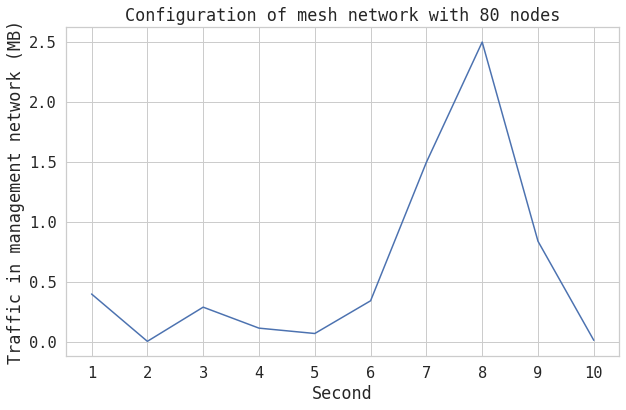

In [72]:
fig, ax = plt.subplots(1,1,figsize=(9,6))

ax = sns.lineplot(x="Second",y="Length",data=times[1:].groupby('Second').sum('Length')/1000000)

ax.set_title('Configuration of mesh network with 80 nodes')
ax.set_ylabel('Traffic in management network (MB)')
ax.set_xlabel('Second')

#ax.set_ylim(0,max(times.service_time)+1)
plt.xticks(np.arange(1, 11, 1))

#plt.gca().xaxis.grid(True)
plt.tight_layout()
plt.savefig("congestionMB.pdf")

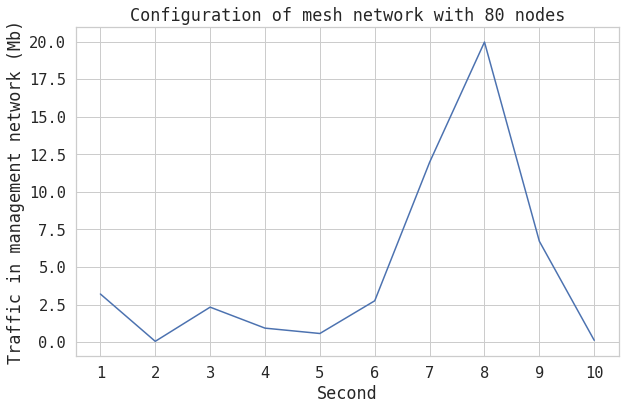

In [73]:
fig, ax = plt.subplots(1,1,figsize=(9,6))

ax = sns.lineplot(x="Second",y="Length",data=times[1:].groupby('Second').sum('Length')/1000000*8)

ax.set_title('Configuration of mesh network with 80 nodes')
ax.set_ylabel('Traffic in management network (Mb)')
ax.set_xlabel('Second')

#ax.set_ylim(0,max(times.service_time)+1)
plt.xticks(np.arange(1, 11, 1))

#plt.gca().xaxis.grid(True)
plt.tight_layout()
plt.savefig("congestionMb.pdf")